# Election Data Project- Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?

We'll discuss the second data set later on!

Let's go ahead and start with our standard imports:

In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

The data for the polls will be obtained from HuffPost Pollster. You can check their website [here](https://elections.huffingtonpost.com/pollster). There are some pretty awesome politcal data stes to play with there so I encourage you to go and mess around with it yourself after completing this project.

We're going to use the requests module to import some data from the web. For more information on requests, check out the documentation [here](https://2.python-requests.org//en/latest/).

We will also be using StringIO to work with csv data we get from HuffPost. StringIO provides a convenient means of working with text in memory using the file API, find out more about it [here](https://pymotw.com/2/StringIO/)

In [4]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
#from StringIO import StringIO

In [ ]:
# This is the url link for the poll data in csv form
# url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
# source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
# poll_data = StringIO(source)

In [7]:
# read data instead
poll_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [9]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


Let's go ahead and get a quick visualization overview of the affiliation for the polls.

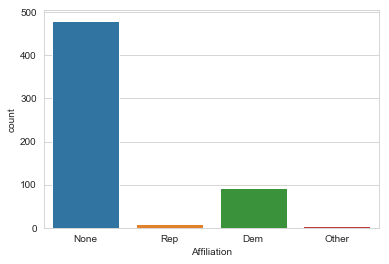

In [12]:
# the affiliation
sns.countplot('Affiliation',data = poll_df)

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

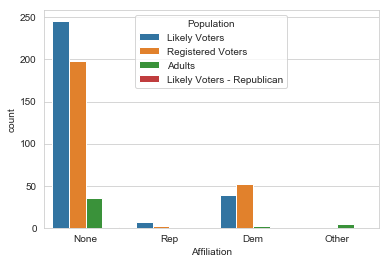

In [14]:
# the affiliation by Population
sns.countplot('Affiliation',data = poll_df,hue = 'Population')


Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

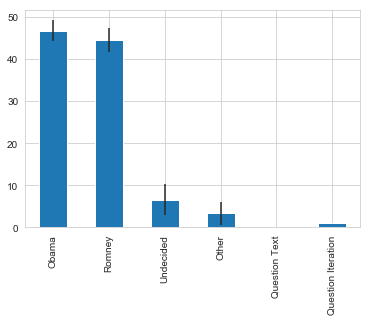

In [21]:
# First we'll get the average
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

# After that let's get the error
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.



In [22]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

#Rename columns
poll_avg.columns = ['Average','STD']

#Show
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [23]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


If we wanted to, we could also do a quick (and messy) time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. Let's take a look at how we could quickly do tht in pandas.

Note: The time is in reverse chronological order. Also keep in mind the multiple polls per end date.

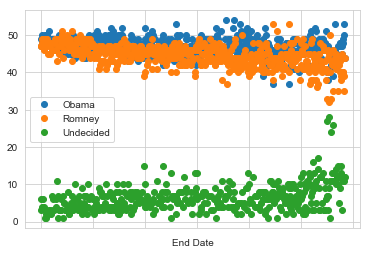

In [24]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

While this may give you a quick idea, go ahead and try creating a new DataFrame or editing poll_df to make a better visualization of the above idea!

To lead you along the right path for plotting, we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along. Remember from the last data project we used the datetime module to create timestamps, let's go ahead and use it now.

In [26]:
# For timestamps
from datetime import datetime


Now we'll define a new column in our poll_df DataFrame to take into account the difference between Romney and Obama in the polls.